In [1]:
import pandas  as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import pygwalker as pyg
import plotly.express as px
from plotly.subplots import make_subplots
import plots 
from importlib import reload 
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

reading data from CSV

In [2]:
Customer= pd.read_csv('./Fact&dim-csv/Dim_Customer.csv')
Date = pd.read_csv('./Fact&dim-csv/Dim_Date.csv')
Geography = pd.read_csv('./Fact&dim-csv/Dim_Geography.csv')
Market = pd.read_csv('./Fact&dim-csv/Dim_Market.csv')
Priority = pd.read_csv('./Fact&dim-csv/Dim_Priority.csv')
Product = pd.read_csv('./Fact&dim-csv/Dim_Product.csv')
Ship_mode = pd.read_csv('./Fact&dim-csv/Dim_Ship_Mode.csv')
Fact_Sales = pd.read_csv('./Fact&dim-csv/Fact_Sales.csv')

### Preparing Dataset

Take a look at Data

In [3]:
Date

,Date,Year,Month,Day,Quarter,Date Key,Day of Week
0,2014-11-05 00:00:00.000,2014,11,5,4,20141105,3
1,2014-12-13 00:00:00.000,2014,12,13,4,20141213,6
2,2014-12-30 00:00:00.000,2014,12,30,4,20141230,2
3,2014-10-27 00:00:00.000,2014,10,27,4,20141027,1
4,2014-12-25 00:00:00.000,2014,12,25,4,20141225,4
...,...,...,...,...,...,...,...
1463,2015-01-02 00:00:00.000,2015,1,2,1,20150102,5
1464,2015-01-05 00:00:00.000,2015,1,5,1,20150105,1
1465,2015-01-04 00:00:00.000,2015,1,4,1,20150104,0
1466,2015-01-06 00:00:00.000,2015,1,6,1,20150106,2


In [4]:
Geography 

,City,State,Country,Region,Geo Key
0,Sacramento,California,United States,West,9
1,Los Angeles,California,United States,West,27
2,Fresno,California,United States,West,32
3,Huntington Beach,California,United States,West,45
4,San Diego,California,United States,West,111
...,...,...,...,...,...
3767,Araraquara,São Paulo,Brazil,South,3563
3768,Cubatão,São Paulo,Brazil,South,3593
3769,Jaboticabal,São Paulo,Brazil,South,3645
3770,Cosmópolis,São Paulo,Brazil,South,3686


In [5]:
Market 

,Market,Market Key
0,EMEA,1
1,Africa,2
2,US,3
3,Canada,4
4,EU,5
5,APAC,6
6,LATAM,7


In [6]:
Priority 

,Priority Name,Priority Key
0,Medium,1
1,High,2
2,Critical,3
3,Low,4


In [7]:
Product

,Product ID,Category,Sub Category,Product Key,Product Name
0,OFF-EAT-10000522,Office Supplies,Paper,4145,"Eaton Computer Printout Paper, Multicolor"
1,OFF-EAT-10000652,Office Supplies,Paper,4146,"Eaton Computer Printout Paper, 8.5 x 11"
2,OFF-EAT-10000820,Office Supplies,Paper,4147,"Eaton Message Books, Multicolor"
3,OFF-EAT-10000854,Office Supplies,Paper,4148,"Eaton Parchment Paper, Recycled"
4,OFF-EAT-10001025,Office Supplies,Paper,4149,"Eaton Note Cards, Multicolor"
...,...,...,...,...,...
10241,FUR-TA-10004892,Furniture,Tables,2180,"Chromcraft Wood Table, with Bottom Storage"
10242,FUR-TA-10004915,Furniture,Tables,2181,"Office Impressions End Table, 20-1/2""H x 24""W ..."
10243,FUR-TA-10004937,Furniture,Tables,2182,"Chromcraft Conference Table, Rectangular"
10244,FUR-TA-10004957,Furniture,Tables,2183,"Bevis Wood Table, Fully Assembled"


In [8]:
Ship_mode 

,Ship Mode Name,Ship Mode Key
0,Same Day,1
1,Second Class,2
2,First Class,3
3,Standard Class,4


In [9]:
Customer  

,Customer ID,Customer Name,Segment,Customer Key
0,AA-10315,Alex Avila,Consumer,1
1,AA-10375,Allen Armold,Consumer,2
2,AA-10480,Andrew Allen,Consumer,3
3,AA-10645,Anna Andreadi,Consumer,4
4,AB-10015,Aaron Bergman,Consumer,5
...,...,...,...,...
790,TW-11025,Tamara Willingham,Home Office,775
791,VF-11715,Vicky Freymann,Home Office,780
792,VM-11685,Valerie Mitchum,Home Office,783
793,VP-11730,Victor Preis,Home Office,785


In [10]:
Fact_Sales

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Is Returned,Product Key,Customer Key,Order Date Key,Ship Date Key,Geo Key,Ship Mode Key,Market Key,Priority Key
0,84,263.920013,2,0.0,5.240000,16.438999,0,6863,548,20130625,20130701,197,4,7,1
1,1233,13.880000,2,0.0,1.240000,1.332000,0,3659,154,20141029,20141104,197,4,7,1
2,492,8.880000,2,0.0,3.720000,0.477000,0,5473,664,20131105,20131111,197,4,7,1
3,2363,703.159973,2,0.0,161.720001,62.397999,0,2750,366,20111015,20111019,197,4,7,1
4,342,13.440000,2,0.0,2.400000,0.801000,0,3462,204,20111224,20111229,197,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,9322,142.591995,2,0.2,28.511999,6.405000,0,843,621,20130730,20130803,29,4,7,1
49666,9335,28.351999,2,0.2,7.432000,1.719000,0,6478,168,20130913,20130919,29,4,7,1
49667,9336,61.824001,2,0.2,17.743999,2.808000,0,8310,168,20130913,20130919,29,4,7,1
49668,9357,44.784000,3,0.2,-11.196000,2.494000,0,3865,711,20131121,20131125,29,4,7,1


Merging Datasets and preparing Main Dataset

In [11]:
Fact_Sales=Fact_Sales.merge(Customer , how='inner' , on='Customer Key')
Fact_Sales=Fact_Sales.merge(Ship_mode , how='inner' , on='Ship Mode Key')
Fact_Sales=Fact_Sales.merge(Product , how='inner' , on='Product Key')
Fact_Sales=Fact_Sales.merge(Priority, how='inner' , on='Priority Key')
Fact_Sales=Fact_Sales.merge(Market , how='inner' , on='Market Key')
Fact_Sales=Fact_Sales.merge(Geography , how='inner' , on='Geo Key')
Fact_Sales=Fact_Sales.merge(Date , how='inner' , left_on='Order Date Key' , right_on='Date Key')


In [12]:
Fact_Sales.columns

Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Is Returned', 'Product Key', 'Customer Key', 'Order Date Key',
       'Ship Date Key', 'Geo Key', 'Ship Mode Key', 'Market Key',
       'Priority Key', 'Customer ID', 'Customer Name', 'Segment',
       'Ship Mode Name', 'Product ID', 'Category', 'Sub Category',
       'Product Name', 'Priority Name', 'Market', 'City', 'State', 'Country',
       'Region', 'Date', 'Year', 'Month', 'Day', 'Quarter', 'Date Key',
       'Day of Week'],
      dtype='object')

In [13]:
Fact_Sales=Fact_Sales.drop(columns=[
    'Product Key', 
    'Customer Key', 
    'Geo Key',
    'Priority Key',
    'Ship Mode Key',
    'Market Key',
    'Ship Date Key',
    ])

removing culomns with Is Retuurn =1

In [14]:
Is_return_1 =['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',]
Fact_Sales=Fact_Sales[Fact_Sales['Is Returned']==0]

In [15]:
Fact_Sales

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Is Returned,Order Date Key,Customer ID,Customer Name,...,State,Country,Region,Date,Year,Month,Day,Quarter,Date Key,Day of Week
0,84,263.920013,2,0.0,5.240000,16.438999,0,20130625,MW-18220,Mitch Webber,...,Distrito Federal,Mexico,North,2013-06-25 00:00:00.000,2013,6,25,2,20130625,2
1,1233,13.880000,2,0.0,1.240000,1.332000,0,20141029,CL-12700,Craig Leslie,...,Distrito Federal,Mexico,North,2014-10-29 00:00:00.000,2014,10,29,4,20141029,3
2,492,8.880000,2,0.0,3.720000,0.477000,0,20131105,RW-19690,Robert Waldorf,...,Distrito Federal,Mexico,North,2013-11-05 00:00:00.000,2013,11,5,4,20131105,2
3,2363,703.159973,2,0.0,161.720001,62.397999,0,20111015,JG-15115,Jack Garza,...,Distrito Federal,Mexico,North,2011-10-15 00:00:00.000,2011,10,15,4,20111015,6
4,342,13.440000,2,0.0,2.400000,0.801000,0,20111224,DE-13255,Deanra Eno,...,Distrito Federal,Mexico,North,2011-12-24 00:00:00.000,2011,12,24,4,20111224,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,9322,142.591995,2,0.2,28.511999,6.405000,0,20130730,RA-19945,Ryan Akin,...,Santo Domingo,Dominican Republic,Caribbean,2013-07-30 00:00:00.000,2013,7,30,3,20130730,2
49666,9335,28.351999,2,0.2,7.432000,1.719000,0,20130913,CP-12340,Christine Phan,...,Santo Domingo,Dominican Republic,Caribbean,2013-09-13 00:00:00.000,2013,9,13,3,20130913,5
49667,9336,61.824001,2,0.2,17.743999,2.808000,0,20130913,CP-12340,Christine Phan,...,Santo Domingo,Dominican Republic,Caribbean,2013-09-13 00:00:00.000,2013,9,13,3,20130913,5
49668,9357,44.784000,3,0.2,-11.196000,2.494000,0,20131121,SP-10860,Sung Pak,...,Santo Domingo,Dominican Republic,Caribbean,2013-11-21 00:00:00.000,2013,11,21,4,20131121,4


chosing features and making columns for count of orders each customer had each year 

In [16]:
Customer=Fact_Sales.groupby('Customer ID').sum()
dims = ['Sales' , 'Quantity' , 'Discount' , 'Profit' , 'Shipping Cost' , 'Is Returned' ]
Customer = Customer[dims]

In [17]:
#How many times customr have bought anything
Customer_year = Fact_Sales.groupby(['Customer ID' , 'Year'] , as_index=False).count()
Customer_year = Customer_year.iloc[: , :3 ]
Customer_year=Customer_year.rename(columns={'Row ID' : 'Shopping_Per_Year'})
Customer_year=Customer_year.pivot(index='Customer ID', 
                    columns='Year', 
                    values='Shopping_Per_Year')
Customer_year=Customer_year.fillna(0)


In [18]:
#Adding New Year Columns To DataFrame
Customer=Customer.merge(Customer_year, how='inner' , on='Customer ID')
Customer=Customer.rename(columns={2011:'2011',2012:'2012',2013:'2013', 2014:'2014'})

In [19]:
Customer

,Sales,Quantity,Discount,Profit,Shipping Cost,Is Returned,2011,2012,2013,2014
Customer ID,,,,,,,,,,
AA-10315,12475.646490,120,6.000,335.615909,999.976000,0,9.0,2.0,15.0,11.0
AA-10375,5013.637030,151,6.600,704.948981,770.807005,0,8.0,10.0,12.0,19.0
AA-10480,19759.086690,175,5.082,2071.089021,1815.271016,0,10.0,13.0,12.0,13.0
AA-10645,17129.042639,297,15.494,2732.854844,1923.480002,0,15.0,27.0,27.0,19.0
AB-10015,22810.086236,294,9.650,4296.952004,3017.310014,0,14.0,25.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...,...
XP-11865,10373.735657,182,3.670,1757.469569,883.463007,0,14.0,9.0,20.0,9.0
YC-11895,18367.234083,169,3.370,4038.296015,2220.482984,0,18.0,13.0,10.0,8.0
YS-11880,17915.070204,178,4.400,3119.207187,1574.426017,0,4.0,23.0,8.0,19.0


### Seprating Test and Train datasets

In [20]:
# X_train , X_test =train_test_split(Customer, train_size=0.8 , test_size=0.2)

In [21]:
X_train=Customer.copy()

In [22]:
X_train=X_train.drop(columns=['Is Returned'])

In [23]:
X_train

,Sales,Quantity,Discount,Profit,Shipping Cost,2011,2012,2013,2014
Customer ID,,,,,,,,,
AA-10315,12475.646490,120,6.000,335.615909,999.976000,9.0,2.0,15.0,11.0
AA-10375,5013.637030,151,6.600,704.948981,770.807005,8.0,10.0,12.0,19.0
AA-10480,19759.086690,175,5.082,2071.089021,1815.271016,10.0,13.0,12.0,13.0
AA-10645,17129.042639,297,15.494,2732.854844,1923.480002,15.0,27.0,27.0,19.0
AB-10015,22810.086236,294,9.650,4296.952004,3017.310014,14.0,25.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...
XP-11865,10373.735657,182,3.670,1757.469569,883.463007,14.0,9.0,20.0,9.0
YC-11895,18367.234083,169,3.370,4038.296015,2220.482984,18.0,13.0,10.0,8.0
YS-11880,17915.070204,178,4.400,3119.207187,1574.426017,4.0,23.0,8.0,19.0


### Plots
making some plots can give us a vision for chosing features

In [24]:
plots_vars= ['2014' if x == 'Is Returned' else x for x in dims]

In [25]:
plots_vars.extend(['2011' , '2012' , '2013'])

In [26]:
reload(plots)

<module 'plots' from 'd:\\Quera Bootcamp\\Data Analysis\\Week 10\\final project\\Data\\plots.py'>

c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posi

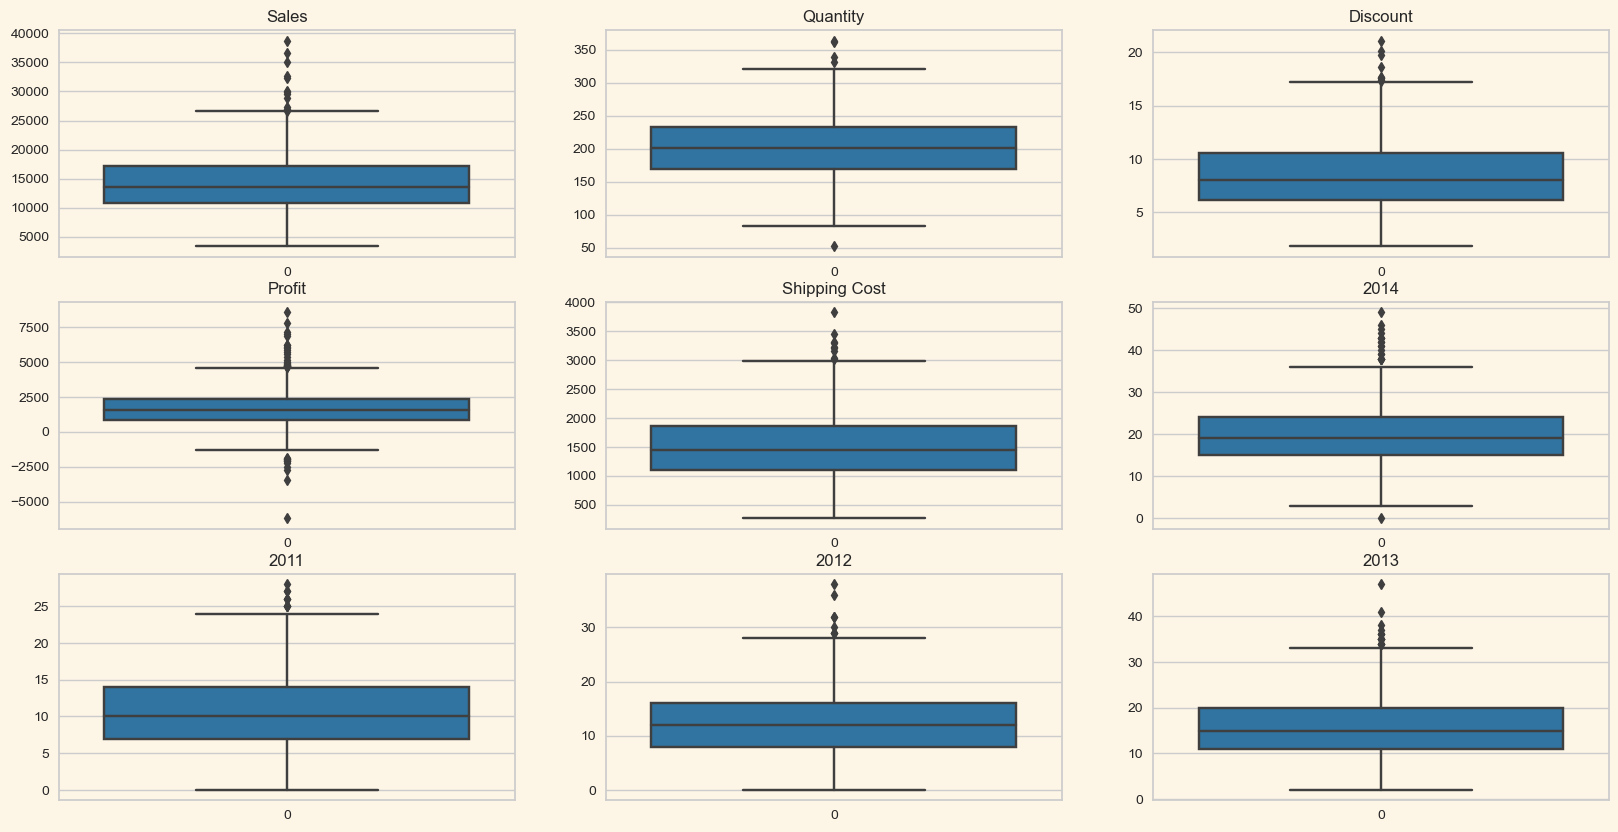

In [27]:
plots.Box_plot(Customer , plots_vars)

c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

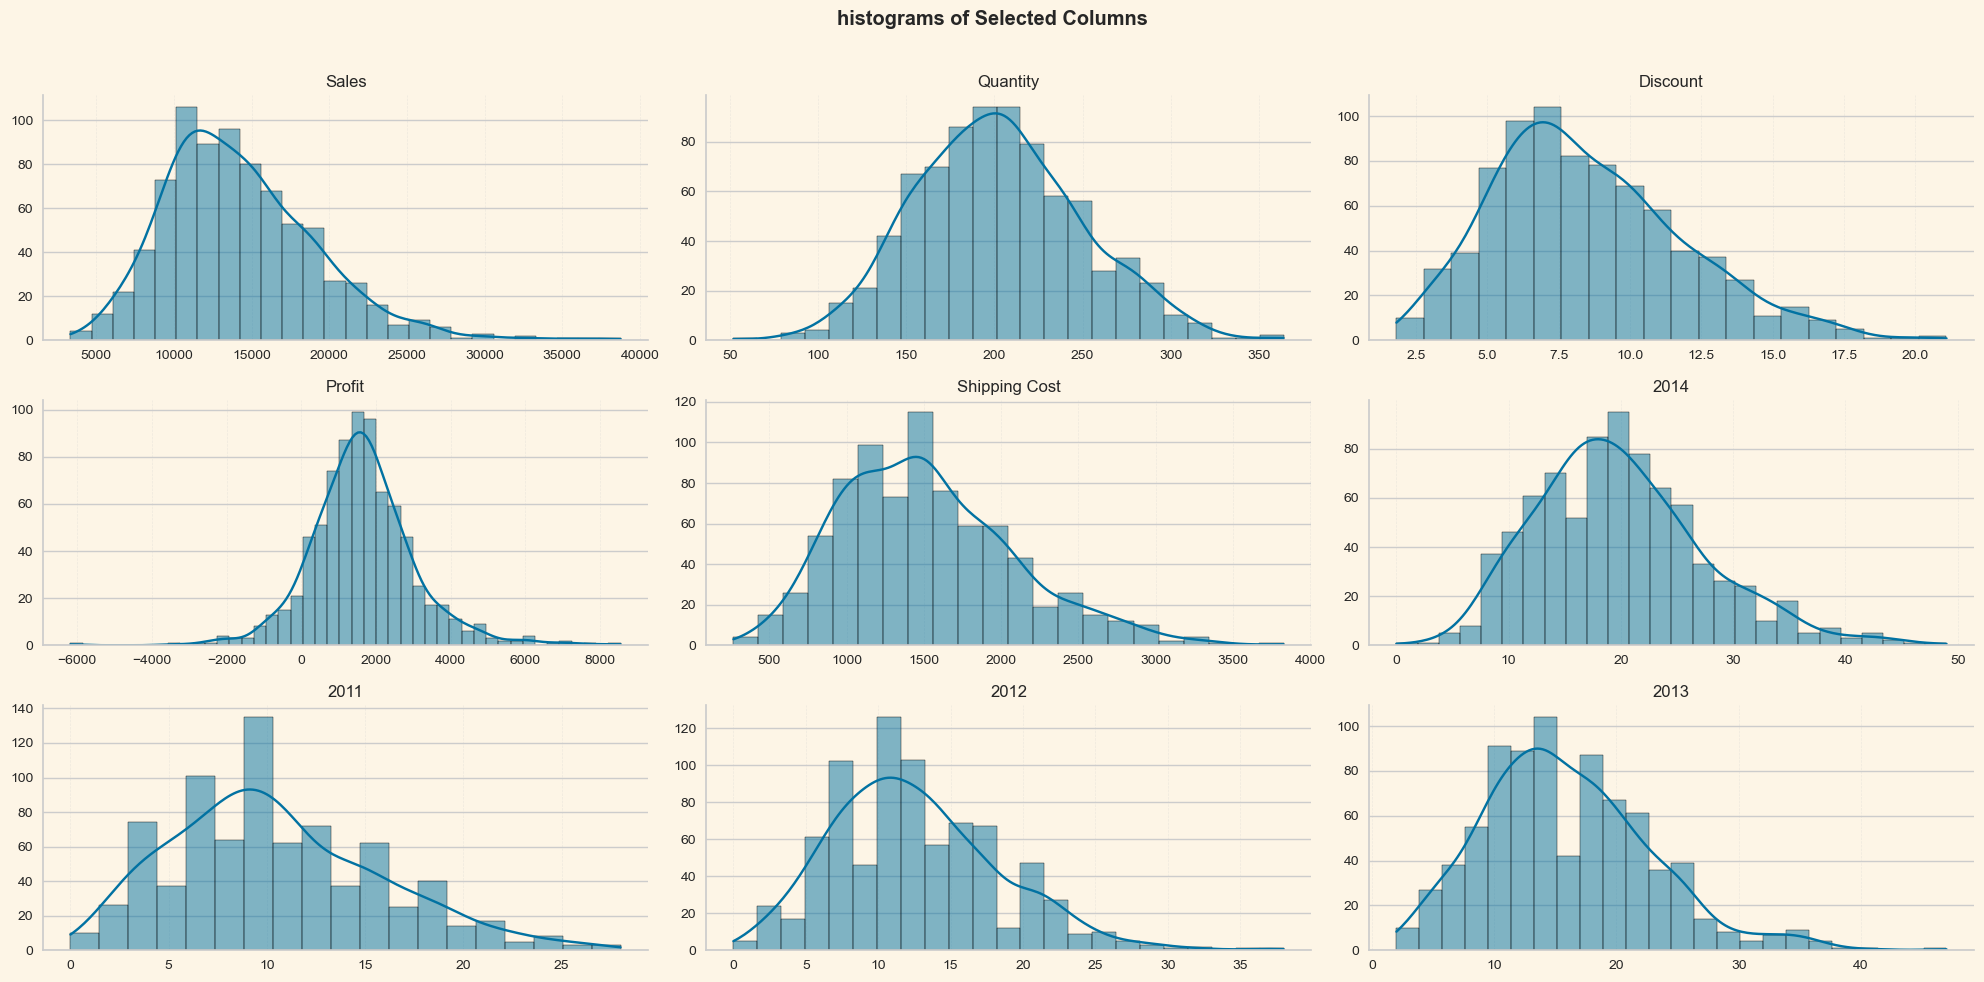

In [28]:
plots.hist_plot( Customer , plots_vars )

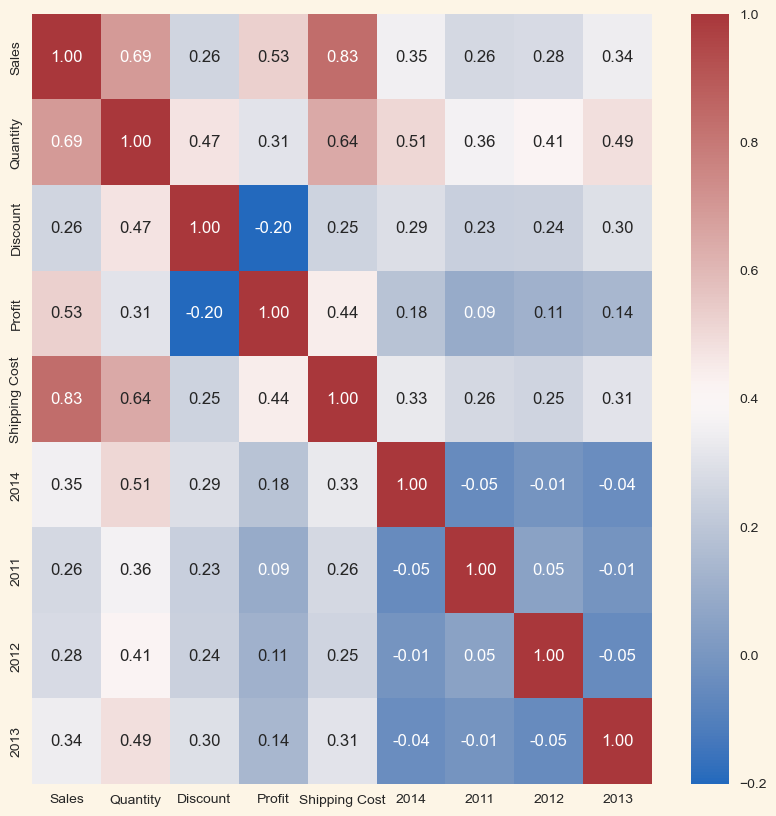

In [29]:
plots.corr_plot(Customer , plots_vars)

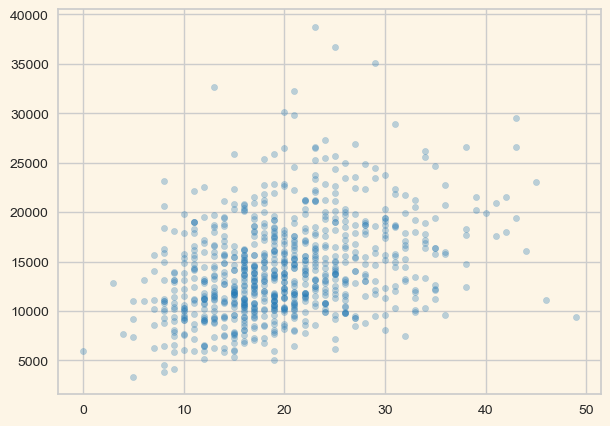

In [30]:
plots.Scatter_plot(Customer['2014'] , Customer['Sales'])

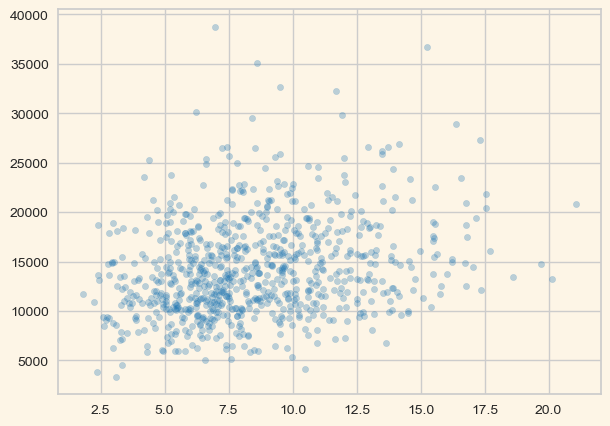

In [31]:
plots.Scatter_plot(Customer['Discount'] , Customer['Sales'])

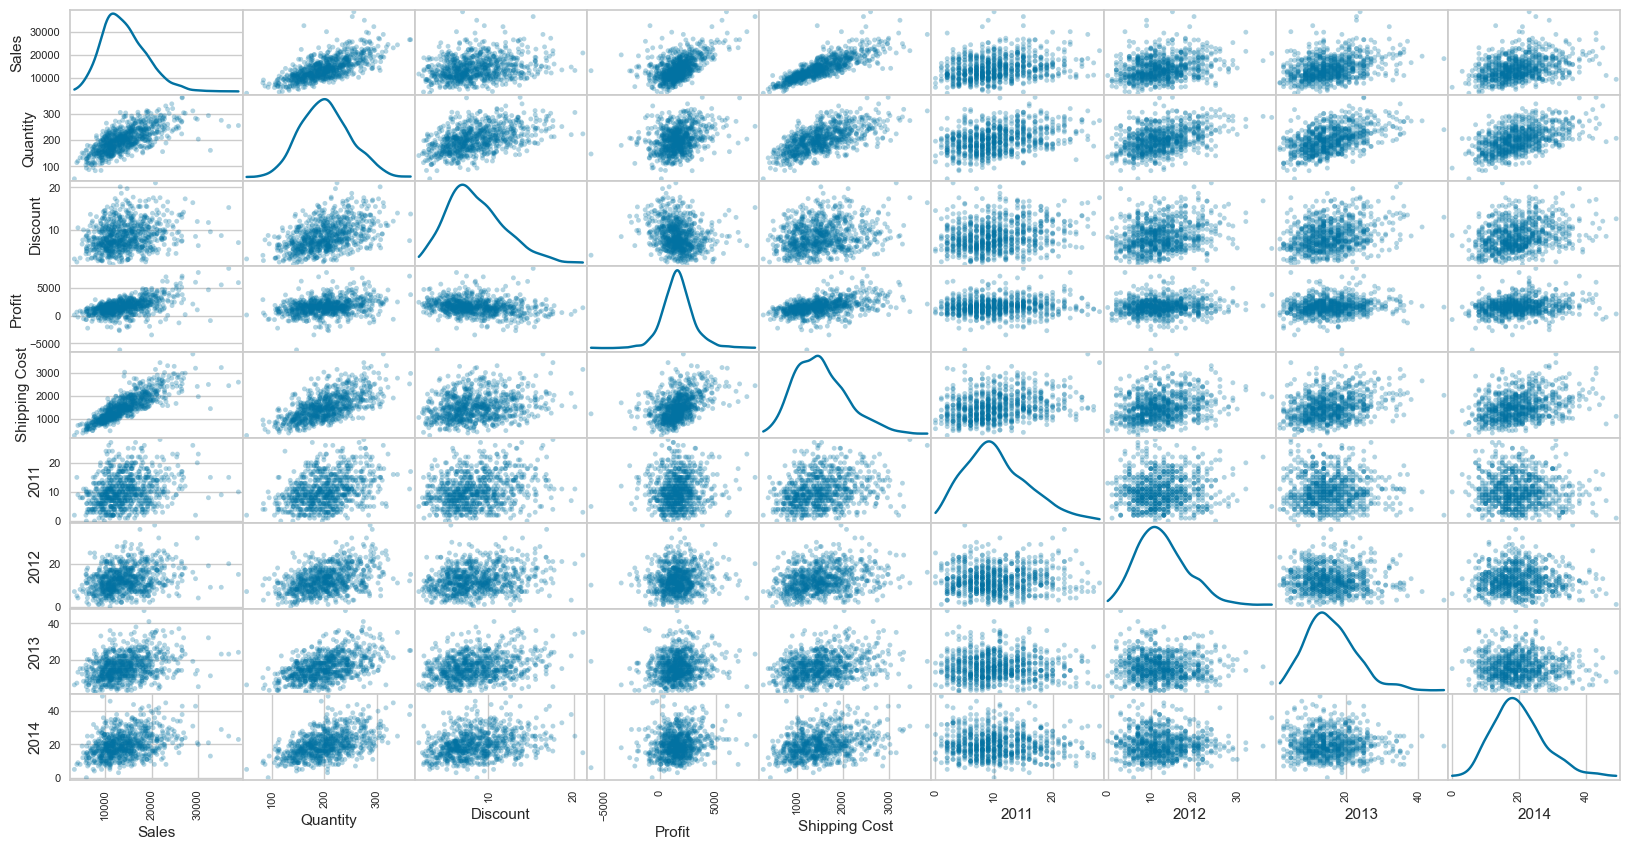

In [32]:
pd.plotting.scatter_matrix(X_train, diagonal='kde', alpha=0.3 , figsize=(20,10) )
plt.show()

In [33]:
pyg.walk(X_train , hideDataSourceConfig=True , theme_key='vega' , dark= 'media')

Box(children=(HTML(value='\n<div id="ifr-pyg-0006417f02646c017Xc4jwbeapnMAyUL" style="height: auto">\n    <hea…

### Normalizing Columns
based on histograms I'll Normalize my columns with standard scaler

In [34]:
X_train

,Sales,Quantity,Discount,Profit,Shipping Cost,2011,2012,2013,2014
Customer ID,,,,,,,,,
AA-10315,12475.646490,120,6.000,335.615909,999.976000,9.0,2.0,15.0,11.0
AA-10375,5013.637030,151,6.600,704.948981,770.807005,8.0,10.0,12.0,19.0
AA-10480,19759.086690,175,5.082,2071.089021,1815.271016,10.0,13.0,12.0,13.0
AA-10645,17129.042639,297,15.494,2732.854844,1923.480002,15.0,27.0,27.0,19.0
AB-10015,22810.086236,294,9.650,4296.952004,3017.310014,14.0,25.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...
XP-11865,10373.735657,182,3.670,1757.469569,883.463007,14.0,9.0,20.0,9.0
YC-11895,18367.234083,169,3.370,4038.296015,2220.482984,18.0,13.0,10.0,8.0
YS-11880,17915.070204,178,4.400,3119.207187,1574.426017,4.0,23.0,8.0,19.0


In [35]:
features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
            '2011', '2012', '2013', '2014']

standard_X = X_train.copy()
for feature in features:
    Std_scaler = StandardScaler()
    standard_X[feature] = Std_scaler.fit_transform(X_train[[feature]])


In [36]:
standard_X

,Sales,Quantity,Discount,Profit,Shipping Cost,2011,2012,2013,2014
Customer ID,,,,,,,,,
AA-10315,-0.358401,-1.757811,-0.758774,-0.914396,-0.920249,-0.265430,-1.818198,-0.132568,-1.179008
AA-10375,-1.875975,-1.096539,-0.577937,-0.654111,-1.326601,-0.452006,-0.437288,-0.572312,-0.115543
AA-10480,1.122858,-0.584587,-1.035455,0.308666,0.525396,-0.078855,0.080553,-0.572312,-0.913142
AA-10645,0.587976,2.017839,2.102677,0.775041,0.717268,0.854023,2.497146,1.626406,-0.115543
AB-10015,1.743350,1.953845,0.341320,1.877328,2.656798,0.667447,2.151918,1.772988,0.017390
...,...,...,...,...,...,...,...,...,...
XP-11865,-0.785874,-0.435267,-1.461026,0.087645,-1.126844,0.667447,-0.609902,0.600338,-1.444875
YC-11895,0.839792,-0.712575,-1.551445,1.695042,1.243900,1.413749,0.080553,-0.865475,-1.577808
YS-11880,0.747834,-0.520592,-1.241007,1.047320,0.098341,-1.198308,1.806691,-1.158637,-0.115543


### Dimension reduction

I reduce dimensions with PCA and TSNE method, it helps to check if our data is clusterable

In [37]:
reload(plots)

<module 'plots' from 'd:\\Quera Bootcamp\\Data Analysis\\Week 10\\final project\\Data\\plots.py'>

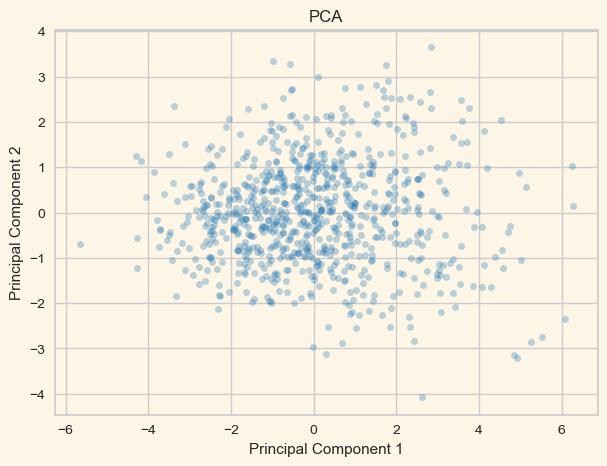

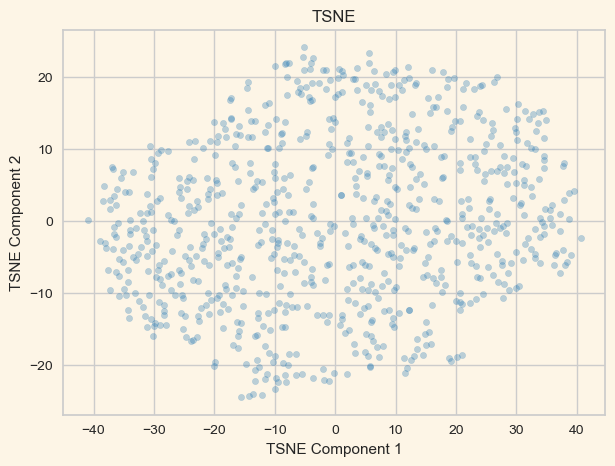

In [38]:
plots.Clusterability(standard_X)

With TSNE we can see it's possible to segment our customers and probably it's better to make three groups of them

### K mean
#### Best K

for this part I want to find best suitable K for my dataset so I'm gonna chec results from elbow method and silhoute score

In [39]:
reload(plots)

<module 'plots' from 'd:\\Quera Bootcamp\\Data Analysis\\Week 10\\final project\\Data\\plots.py'>

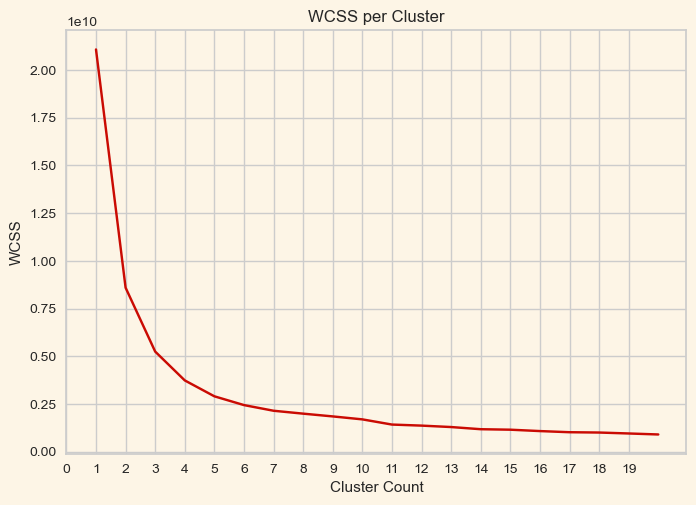

In [40]:
#Elbow methor for not scaled data
plots.fn_calculate_wcss(X_train , 20)

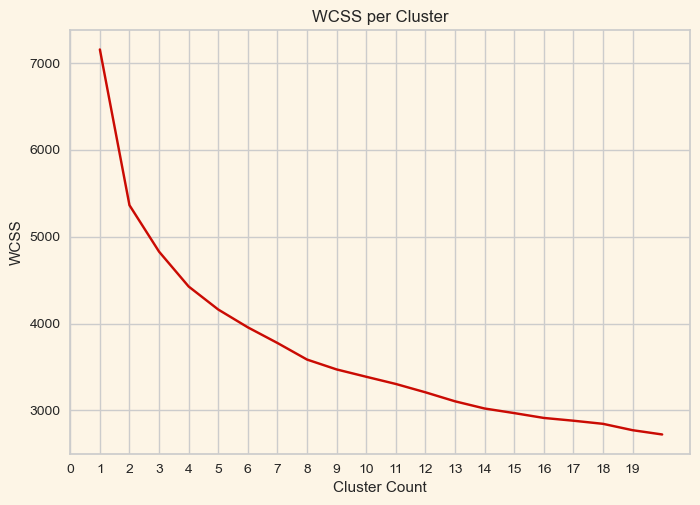

In [41]:
plots.fn_calculate_wcss(standard_X , 20)

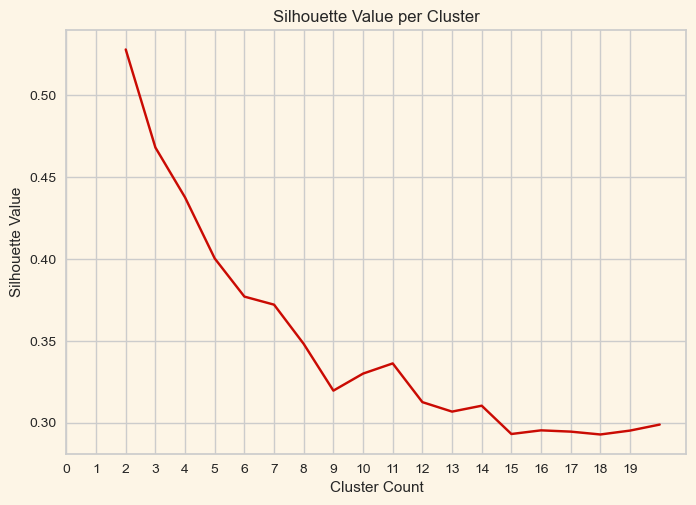

In [42]:
plots.fn_calculate_silhouette(X_train , 20)

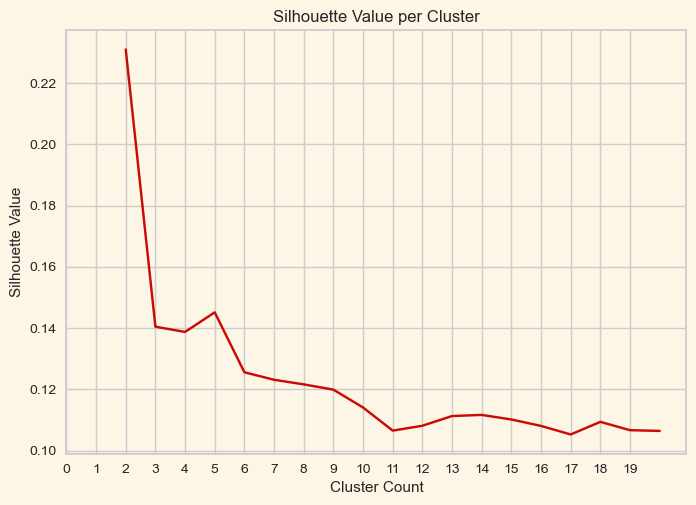

In [43]:
plots.fn_calculate_silhouette(standard_X , 20)

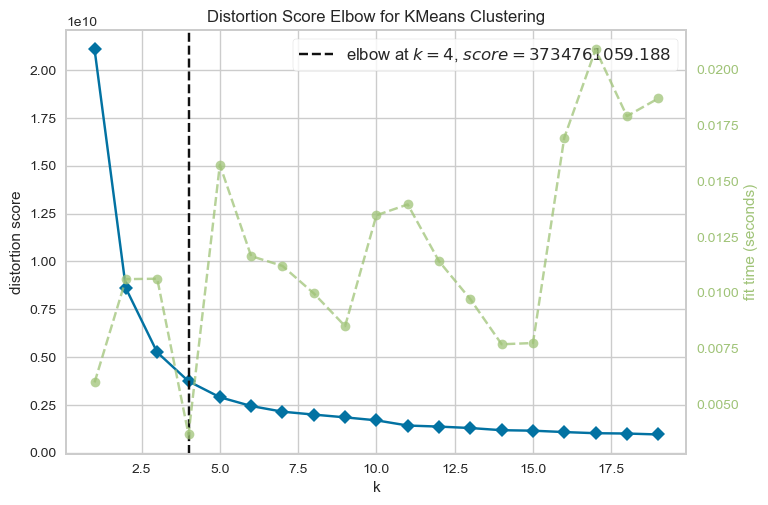

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
#drawing plot with yellow brick
model_kmeans_yb = KMeans(
    max_iter=1000,
    random_state=0
    )
visualizer = KElbowVisualizer(estimator=model_kmeans_yb, k=(1, 20))
visualizer.fit(X_train)
visualizer.show() 

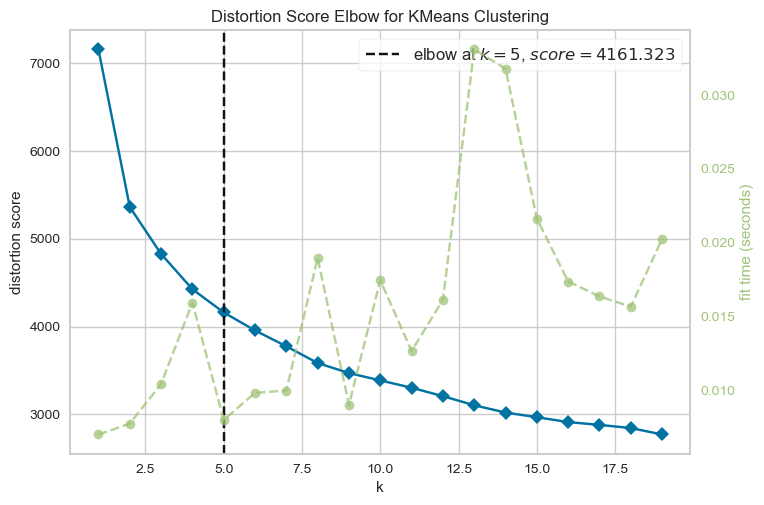

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
#drawing plots with yellow brick
model_kmeans_yb_std = KMeans(
    max_iter=1000,
    random_state=0
    )
visualizer = KElbowVisualizer(estimator=model_kmeans_yb_std, k=(1, 20))
visualizer.fit(standard_X)
visualizer.show() 

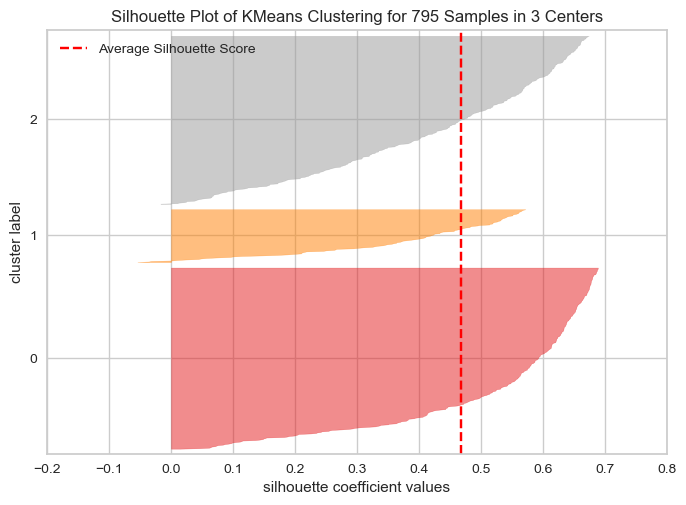

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 795 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
#drawing plots with yellow brick
model_kmeans_yb = KMeans(
    n_clusters=3,
    max_iter=1000,
    random_state=0
)

visualizer = SilhouetteVisualizer(estimator=model_kmeans_yb)
visualizer.fit(X_train)
visualizer.show() 

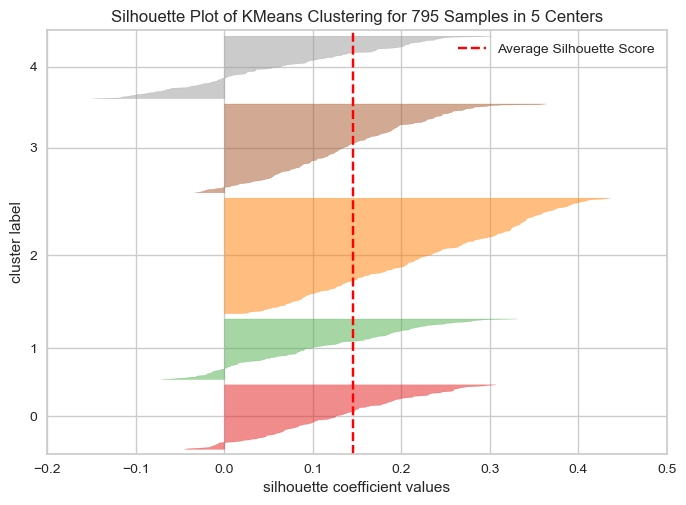

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 795 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
#drawing plots with yellow brick
model_kmeans_yb_std = KMeans(
    n_clusters=5,
    max_iter=1000,
    random_state=0
)

visualizer = SilhouetteVisualizer(estimator=model_kmeans_yb_std)
visualizer.fit(standard_X)
visualizer.show() 

Finally I chose k=3 for nonscaled data and k=5 for scaled data, the decision was made based on a mx of the results obtained from the charts above

In [48]:
model_kmeans = KMeans(
    n_clusters=3,  
    max_iter=1000,
    random_state=0
)

model_kmeans.fit(
    X_train
)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [49]:
model_kmeans_std = KMeans(
    n_clusters=5,  
    max_iter=1000,
    random_state=0
)

model_kmeans_std.fit(
    standard_X
)

KMeans(max_iter=1000, n_clusters=5, random_state=0)

In [50]:
#making Cluster culomn for X_train
X_train['Cluster'] = model_kmeans.labels_

In [51]:
#making Cluster column for standard_X
standard_X['Cluster'] = model_kmeans_std.labels_

In [52]:
X_train

,Sales,Quantity,Discount,Profit,Shipping Cost,2011,2012,2013,2014,Cluster
Customer ID,,,,,,,,,,
AA-10315,12475.646490,120,6.000,335.615909,999.976000,9.0,2.0,15.0,11.0,0
AA-10375,5013.637030,151,6.600,704.948981,770.807005,8.0,10.0,12.0,19.0,0
AA-10480,19759.086690,175,5.082,2071.089021,1815.271016,10.0,13.0,12.0,13.0,1
AA-10645,17129.042639,297,15.494,2732.854844,1923.480002,15.0,27.0,27.0,19.0,2
AB-10015,22810.086236,294,9.650,4296.952004,3017.310014,14.0,25.0,28.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...
XP-11865,10373.735657,182,3.670,1757.469569,883.463007,14.0,9.0,20.0,9.0,0
YC-11895,18367.234083,169,3.370,4038.296015,2220.482984,18.0,13.0,10.0,8.0,2
YS-11880,17915.070204,178,4.400,3119.207187,1574.426017,4.0,23.0,8.0,19.0,2


In [53]:
standard_X

,Sales,Quantity,Discount,Profit,Shipping Cost,2011,2012,2013,2014,Cluster
Customer ID,,,,,,,,,,
AA-10315,-0.358401,-1.757811,-0.758774,-0.914396,-0.920249,-0.265430,-1.818198,-0.132568,-1.179008,2
AA-10375,-1.875975,-1.096539,-0.577937,-0.654111,-1.326601,-0.452006,-0.437288,-0.572312,-0.115543,2
AA-10480,1.122858,-0.584587,-1.035455,0.308666,0.525396,-0.078855,0.080553,-0.572312,-0.913142,3
AA-10645,0.587976,2.017839,2.102677,0.775041,0.717268,0.854023,2.497146,1.626406,-0.115543,4
AB-10015,1.743350,1.953845,0.341320,1.877328,2.656798,0.667447,2.151918,1.772988,0.017390,4
...,...,...,...,...,...,...,...,...,...,...
XP-11865,-0.785874,-0.435267,-1.461026,0.087645,-1.126844,0.667447,-0.609902,0.600338,-1.444875,2
YC-11895,0.839792,-0.712575,-1.551445,1.695042,1.243900,1.413749,0.080553,-0.865475,-1.577808,3
YS-11880,0.747834,-0.520592,-1.241007,1.047320,0.098341,-1.198308,1.806691,-1.158637,-0.115543,3


In [54]:
#non_scaled data inertia and silhoute score
print(f'model inertia is:{model_kmeans.inertia_}')
print(f'model Silhouette score : {silhouette_score(X=X_train,labels=model_kmeans.labels_,metric="euclidean")}')

model inertia is:5245896264.239805
model Silhouette score : 0.4682073692224203


In [55]:
#scaled data inertia and silhoute score
print(f'model inertia is:{model_kmeans_std.inertia_}')
print(f'model Silhouette score : {silhouette_score(X=standard_X,labels=model_kmeans_std.labels_,metric="euclidean")}')

model inertia is:4161.3230309880155
model Silhouette score : 0.2136360330844867


Now let's check how good is working our model

In [56]:
X_train.groupby('Cluster').agg(
    customers=('Sales', 'count'),

    Sales_mean =('Sales' , 'mean'),
    Sales_min =('Sales' , 'min'),
    Sales_max =('Sales' , 'max'),

    Quantity_mean=('Quantity', 'mean'),
    Quantity_min=('Quantity', 'min'),
    Quantity_max=('Quantity', 'max'),

    Discount_mean=('Discount', 'mean'),
    Discount_min=('Discount', 'min'),
    Discount_max=('Discount', 'max'),

    Profit_mean=('Profit', 'mean'),
    Profit_min=('Profit', 'min'),
    Profit_max=('Profit', 'max'),

    Shipping_Cost_mean=('Shipping Cost', 'mean'),
    Shipping_Cost_min=('Shipping Cost', 'min'),
    Shipping_Cost_max=('Shipping Cost', 'max'),

    first_year_mean=('2011' , 'mean'),
    first_year_min=('2011' , 'min'),
    first_year_max=('2011' , 'max'),

    second_year_mean=('2012' , 'mean'),
    second_year_min=('2012' , 'min'),
    second_year_max=('2012' , 'max'),

    third_year_mean=('2013' , 'mean'),
    third_year_min=('2013' , 'min'),
    third_year_max=('2013' , 'max'),

    last_year_mean=('2014' , 'mean'),
    last_year_min=('2014' , 'min'),
    last_year_max=('2014' , 'max'),
)

,customers,Sales_mean,Sales_min,Sales_max,Quantity_mean,Quantity_min,Quantity_max,Discount_mean,Discount_min,Discount_max,...,first_year_max,second_year_mean,second_year_min,second_year_max,third_year_mean,third_year_min,third_year_max,last_year_mean,last_year_min,last_year_max
Cluster,,,,,,,,,,,,,,,,,,,,,
0,358,10140.600379,3344.006076,13144.072950,172.874302,52,273,7.795827,1.820,17.372,...,27.0,10.857542,0.0,28.0,13.796089,2.0,36.0,17.712291,0.0,49.0
1,105,23184.308214,19445.211161,38753.077493,256.666667,156,364,9.865448,4.212,21.086,...,28.0,15.428571,2.0,38.0,19.961905,4.0,37.0,24.019048,8.0,45.0
2,332,15826.697768,12831.639145,20014.665097,217.087349,126,313,8.869464,2.406,20.152,...,27.0,13.424699,2.0,36.0,16.894578,3.0,47.0,20.882530,7.0,44.0


In [57]:
#for scaled date we should get back our non scaled data
Unstandard_df=X_train.copy()
Unstandard_df['Cluster']=standard_X['Cluster']

In [58]:
Unstandard_df.groupby('Cluster').agg(
    customers=('Sales', 'count'),

    Sales_mean =('Sales' , 'mean'),
    Sales_min =('Sales' , 'min'),
    Sales_max =('Sales' , 'max'),

    Quantity_mean=('Quantity', 'mean'),
    Quantity_min=('Quantity', 'min'),
    Quantity_max=('Quantity', 'max'),

    Discount_mean=('Discount', 'mean'),
    Discount_min=('Discount', 'min'),
    Discount_max=('Discount', 'max'),

    Profit_mean=('Profit', 'mean'),
    Profit_min=('Profit', 'min'),
    Profit_max=('Profit', 'max'),

    Shipping_Cost_mean=('Shipping Cost', 'mean'),
    Shipping_Cost_min=('Shipping Cost', 'min'),
    Shipping_Cost_max=('Shipping Cost', 'max'),

    first_year_mean=('2011' , 'mean'),
    first_year_min=('2011' , 'min'),
    first_year_max=('2011' , 'max'),

    second_year_mean=('2012' , 'mean'),
    second_year_min=('2012' , 'min'),
    second_year_max=('2012' , 'max'),

    third_year_mean=('2013' , 'mean'),
    third_year_min=('2013' , 'min'),
    third_year_max=('2013' , 'max'),

    last_year_mean=('2014' , 'mean'),
    last_year_min=('2014' , 'min'),
    last_year_max=('2014' , 'max'),
)

,customers,Sales_mean,Sales_min,Sales_max,Quantity_mean,Quantity_min,Quantity_max,Discount_mean,Discount_min,Discount_max,...,first_year_max,second_year_mean,second_year_min,second_year_max,third_year_mean,third_year_min,third_year_max,last_year_mean,last_year_min,last_year_max
Cluster,,,,,,,,,,,,,,,,,,,,,
0,131,13393.404198,7144.980977,21554.429754,212.969466,151,294,10.549939,4.750,19.720,...,15.0,12.656489,1.0,28.0,14.328244,3.0,28.0,27.900763,14.0,49.0
1,123,14201.702539,8570.544783,32707.886624,215.430894,155,294,10.616293,3.354,17.050,...,27.0,13.544715,3.0,28.0,14.780488,3.0,36.0,17.227642,3.0,31.0
2,234,9701.986430,3344.006076,15768.237599,152.645299,52,212,6.393829,1.820,14.510,...,24.0,9.867521,0.0,25.0,12.376068,2.0,27.0,15.371795,0.0,32.0
3,180,15462.377012,9055.920745,23117.870213,204.488889,150,273,7.022922,2.406,13.828,...,18.0,12.411111,2.0,30.0,19.144444,6.0,47.0,17.722222,5.0,33.0
4,127,21766.243372,13253.213080,38753.077493,267.622047,204,364,10.419780,4.212,21.086,...,28.0,16.511811,3.0,38.0,20.527559,5.0,41.0,25.472441,11.0,45.0


In [ ]:
plots.Cluster_plot(X_train , features , 'Cluster') 

c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
plots.Cluster_plot(standard_X , features , 'Cluster')

c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\bashir rayaneh\miniconda3\envs\quera\lib\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

